In [1]:
import pandas as pd
pd.__version__

'1.5.3'

In [2]:
empty_df = pd.DataFrame()
print(empty_df)

Empty DataFrame
Columns: []
Index: []


In [3]:
# using dict + list
datadict = {'names':['n1', 'n2', 'n3'], 'age': [10,12,14], 'city': ['c1','c2', 'c3']}
dict_df = pd.DataFrame(datadict)
dict_df

,names,age,city
0,n1,10,c1
1,n2,12,c2
2,n3,14,c3


In [4]:
# using tuples and list
datatuples = [('n1',10,'c1'), ('n2',12,'c2'), ('n3',14,'c3')]
tuple_df = pd.DataFrame(data=datatuples, columns = ['names', 'age', 'city'])
tuple_df

,names,age,city
0,n1,10,c1
1,n2,12,c2
2,n3,14,c3


In [5]:
# data downloaded from https://www.superdatascience.com/pages/powerbi

cust_df = pd.read_csv('./P6-UK-Bank-Customers.csv')
cust_df.head(7)

,Customer ID,Name,Surname,Gender,Age,Region,Job Classification,Date Joined,Balance
0,100000001,Simon,Walsh,Male,21,England,White Collar,05.Jan.15,113810.15
1,400000002,Jasmine,Miller,Female,34,Northern Ireland,Blue Collar,06.Jan.15,36919.73
2,100000003,Liam,Brown,Male,46,England,White Collar,07.Jan.15,101536.83
3,300000004,Trevor,Parr,Male,32,Wales,White Collar,08.Jan.15,1421.52
4,100000005,Deirdre,Pullman,Female,38,England,Blue Collar,09.Jan.15,35639.79
5,300000006,Ava,Coleman,Female,30,Wales,Blue Collar,09.Jan.15,122443.77
6,100000007,Dorothy,Thomson,Female,34,England,Blue Collar,11.Jan.15,42879.84


In [6]:
cust_df['Balance']=cust_df['Balance'].astype(int)

In [7]:
cust_df.shape

(4014, 9)

In [8]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4014 entries, 0 to 4013
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         4014 non-null   int64 
 1   Name                4014 non-null   object
 2   Surname             4014 non-null   object
 3   Gender              4014 non-null   object
 4   Age                 4014 non-null   int64 
 5   Region              4014 non-null   object
 6   Job Classification  4014 non-null   object
 7   Date Joined         4014 non-null   object
 8   Balance             4014 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 282.4+ KB


In [9]:
filt_males_only = (cust_df['Gender'] == 'Male')
males_df = cust_df.loc[filt_males_only]
males_df.shape

(2165, 9)

In [10]:
males_df.tail()

,Customer ID,Name,Surname,Gender,Age,Region,Job Classification,Date Joined,Balance
4007,100004008,Sam,Sanderson,Male,28,England,Blue Collar,30.Dec.15,42128
4009,200004010,Sam,Lewis,Male,64,Scotland,Other,30.Dec.15,19711
4010,200004011,Keith,Hughes,Male,52,Scotland,Blue Collar,30.Dec.15,56069
4012,200004013,Christian,Reid,Male,51,Scotland,Blue Collar,30.Dec.15,239
4013,300004014,Stephen,May,Male,33,Wales,Blue Collar,30.Dec.15,30293


In [11]:
filt_female_notwhitecollar = (cust_df['Gender']=='Female') & (cust_df['Job Classification'] != 'White Collar')
female_notwhitecollar_df = cust_df.loc[filt_female_notwhitecollar]
print(female_notwhitecollar_df.shape)

(839, 9)


In [12]:
female_notwhitecollar_df.head()

,Customer ID,Name,Surname,Gender,Age,Region,Job Classification,Date Joined,Balance
1,400000002,Jasmine,Miller,Female,34,Northern Ireland,Blue Collar,06.Jan.15,36919
4,100000005,Deirdre,Pullman,Female,38,England,Blue Collar,09.Jan.15,35639
5,300000006,Ava,Coleman,Female,30,Wales,Blue Collar,09.Jan.15,122443
6,100000007,Dorothy,Thomson,Female,34,England,Blue Collar,11.Jan.15,42879
7,200000008,Lisa,Knox,Female,48,Scotland,Other,11.Jan.15,36680


In [13]:
# lambda without function
cust_df['age_bracket1'] = cust_df.apply(lambda df_row: str(df_row['Age'] - (df_row['Age']%5))
                                                       + ' - ' 
                                                       + str(df_row['Age'] + (5 - df_row['Age'])%5), 
                                       axis=1)
cust_df.shape

(4014, 10)

In [14]:
cust_df.head()

,Customer ID,Name,Surname,Gender,Age,Region,Job Classification,Date Joined,Balance,age_bracket1
0,100000001,Simon,Walsh,Male,21,England,White Collar,05.Jan.15,113810,20 - 25
1,400000002,Jasmine,Miller,Female,34,Northern Ireland,Blue Collar,06.Jan.15,36919,30 - 35
2,100000003,Liam,Brown,Male,46,England,White Collar,07.Jan.15,101536,45 - 50
3,300000004,Trevor,Parr,Male,32,Wales,White Collar,08.Jan.15,1421,30 - 35
4,100000005,Deirdre,Pullman,Female,38,England,Blue Collar,09.Jan.15,35639,35 - 40


Note1: (10-42)%10 = +8, where base = 10 and num = 42 in this example  
Note2: 42%10 = +2, where base = 10 and num = 42 in this example

In [15]:
# lambda with function call
def round_up_2_base(num,base):
    return num + (base - num)%base

def round_down_2_base(num,base):
    return num - num%base

base = 10
cust_df['age_bracket2'] = cust_df.apply(lambda df_row: str(round_down_2_base(df_row['Age'], base))
                                                       + ' - ' 
                                                       + str(round_up_2_base(df_row['Age'], base)), axis=1)
cust_df.head()

,Customer ID,Name,Surname,Gender,Age,Region,Job Classification,Date Joined,Balance,age_bracket1,age_bracket2
0,100000001,Simon,Walsh,Male,21,England,White Collar,05.Jan.15,113810,20 - 25,20 - 30
1,400000002,Jasmine,Miller,Female,34,Northern Ireland,Blue Collar,06.Jan.15,36919,30 - 35,30 - 40
2,100000003,Liam,Brown,Male,46,England,White Collar,07.Jan.15,101536,45 - 50,40 - 50
3,300000004,Trevor,Parr,Male,32,Wales,White Collar,08.Jan.15,1421,30 - 35,30 - 40
4,100000005,Deirdre,Pullman,Female,38,England,Blue Collar,09.Jan.15,35639,35 - 40,30 - 40


In [16]:
# max by age bracket and gender
cust_df.groupby(['Gender', 'age_bracket2'])['Balance'].max()

Gender  age_bracket2
Female  10 - 20          97610
        20 - 20          82598
        20 - 30         149698
        30 - 30         143808
        30 - 40         183467
        40 - 40         114118
        40 - 50         123159
        50 - 50          99770
        50 - 60         118676
        60 - 60          67913
        60 - 70         110171
Male    10 - 20          94786
        20 - 20          98261
        20 - 30         146892
        30 - 30         108224
        30 - 40         181680
        40 - 40         107130
        40 - 50         161517
        50 - 50         172085
        50 - 60         141792
        60 - 60         115932
        60 - 70         139415
Name: Balance, dtype: int64

In [17]:
# min & max by age bracket and gender and job classification
#Note: using agg to do multiple aggregations
cust_df.groupby(['Gender', 'age_bracket2', 'Job Classification'])['Balance'].agg(['min', 'max'])

min     max
Gender age_bracket2 Job Classification               
Female 10 - 20      Blue Collar            69   97610
                    Other                2184   65798
                    White Collar         5557   93603
       20 - 20      Other                1291   82598
                    White Collar         1488   74880
...                                       ...     ...
Male   60 - 60      Blue Collar          6961  102409
                    Other               22067  115932
                    White Collar         1860   74666
       60 - 70      Blue Collar          3775  139415
                    Other                4926  105354

[62 rows x 2 columns]

## Some basic plots

In [18]:
import matplotlib.pyplot as plt
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Axes: >

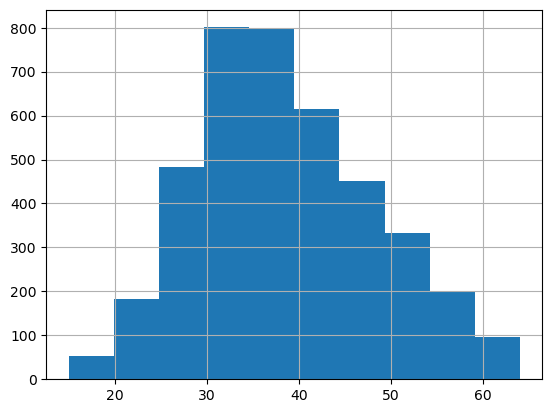

In [19]:
#histogram irrespective of gender
cust_df['Age'].hist()

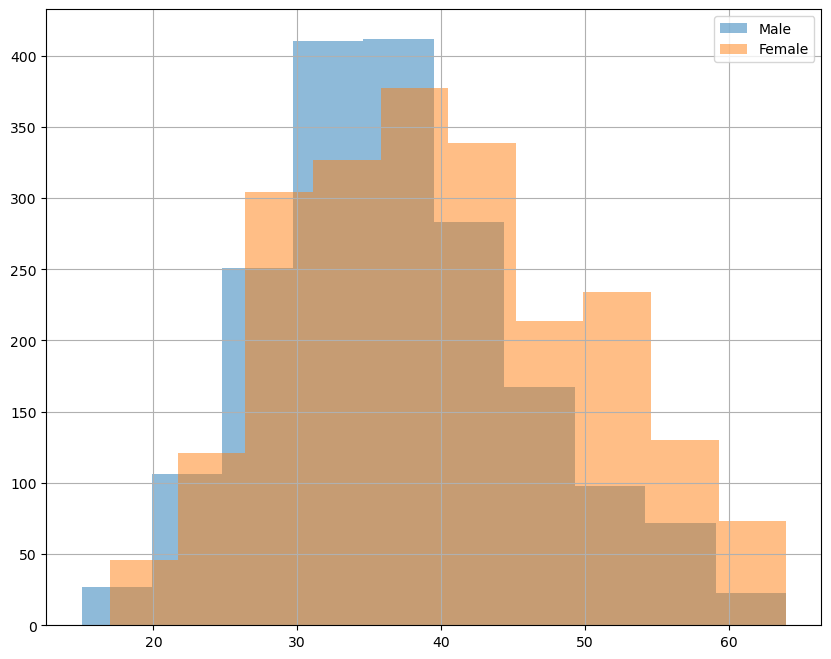

In [20]:
cust_df.groupby('Gender')['Age'].hist(alpha=0.5, figsize=(10, 8))
#unfortunately has to be on separate line and not part of hist function
plt.legend(cust_df['Gender'].unique()) # alternatively plt.legend((['Male', 'Female'])) 

array([<Axes: title={'center': 'Female'}, ylabel='Frequency'>,
       <Axes: title={'center': 'Male'}, ylabel='Frequency'>], dtype=object)

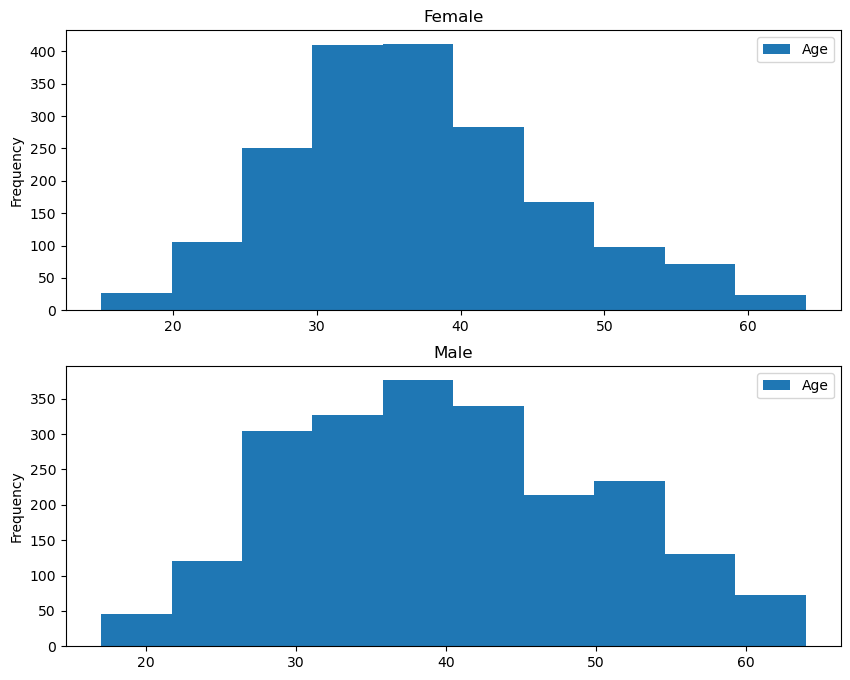

In [21]:
#yet another plot
cust_df.plot.hist(column=['Age'], by='Gender', figsize=(10, 8))

In [22]:
dfp = cust_df.pivot_table(index='Age', columns='Gender', values='Balance', aggfunc='sum')
dfp.head()

Gender,Female,Male
Age,,
15,12548.0,NaN
17,176709.0,5158.0
18,481671.0,526481.0
19,240534.0,498913.0
20,405179.0,254691.0


<Axes: xlabel='Age'>

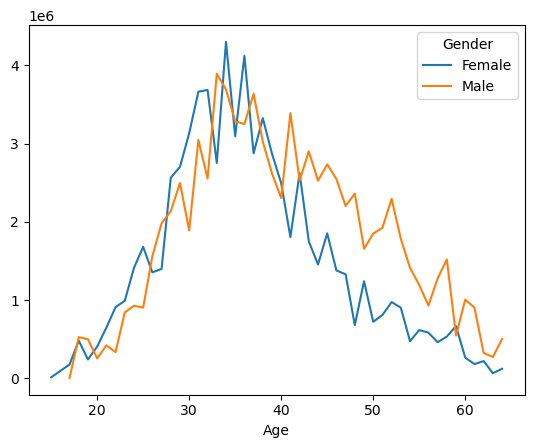

In [23]:
dfp.plot()